# Проект оптимизации маркетинговых затрат для портала продажи билетов

## Описание данных   
**Таблица visits**   
*Uid — уникальный идентификатор пользователя*    
*Device — категория устройства пользователя*  
*Start Ts — дата и время начала сессии*  
*End Ts — дата и время окончания сессии*  
*Source Id — идентификатор рекламного источника, из которого пришел пользователь*  
**Таблица orders**  
*Uid — уникальный id пользователя, который сделал заказ*  
*Buy Ts — дата и время заказа*  
*Revenue — выручка Яндекс.Афиши с этого заказа*  
**Таблица costs**  
*source_id — идентификатор рекламного источника*  
*dt — дата*  
*costs — затраты на этот рекламный источник в этот день*  

# Проект исследования. 
    
**Навигация по исследованию**  
    
*Шаг 1*  
- изучение файлов с данными, первичный анализ материалов и короткий вывод;  

*Продукт*  
 - Сколько людей пользуются в день, неделю, месяц?;  
 - Сколько сессий в день?;  
 - Сколько длится одна сессия?;  
 - Как часто люди возвращаются?;  


 
*Продажи*  
 - Когда люди начинают покупать?;  
 - Сколько раз покупают за период?;  
 - Какой средний чек?;  
 - Сколько денег приносят?;  

    
    
*Маркетинг*  
 - Сколько денег потратили? Всего / на каждый источник / по времени;  
 - Сколько стоило привлечение одного покупателя из каждого источника?;  
 - На сколько окупились расходы?;  
    
    
*Общий вывод*   
 
 - Общий вывод.  
    


# Шаг 1
<a id='1_link'><a>

# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
costs = pd.read_csv('costs.csv')
orders = pd.read_csv('orders_log.csv')
visits = pd.read_csv('visits_log.csv')

## Costs

In [3]:
#display(costs.info()) #дату перевести потрібно
display(costs.head(10))
display(costs.describe())

costs['dt'] = pd.to_datetime(costs['dt'])

# ввсё ок

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


## Orders

In [4]:
display(orders.info())
display(orders.head(10))
display(orders.describe()) #buy ts to datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


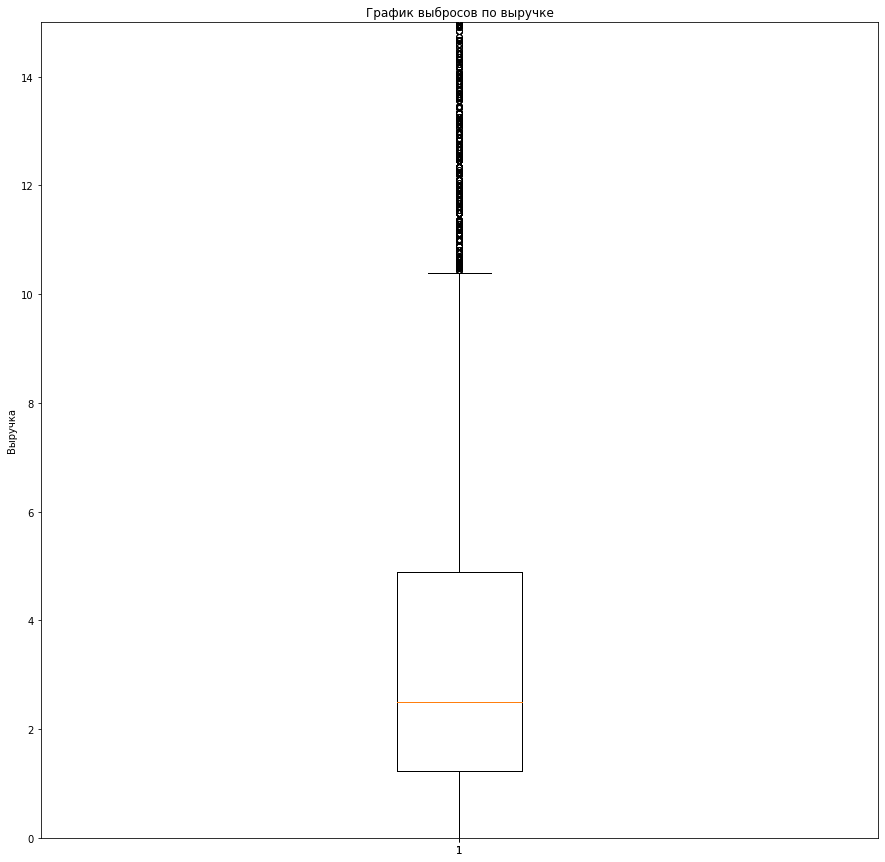

In [5]:
plt.figure(figsize=(15,15))
plt.boxplot(orders['Revenue'])
plt.title('График выбросов по выручке')
plt.ylabel('Выручка')
plt.boxplot(orders['Revenue'])
plt.ylim((0,15))
plt.show()
# кажется много выбросов, но в конечном итоге не убрал их. 


## Visits

In [6]:
display(visits.info())
display(visits.head(10))
display(visits.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [7]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts']) #перевели в дати



В таблицах всё нормально, там где нужно я перевел строки в нужный формат

In [8]:
df_0 = orders.copy()
df_1 = costs.copy()
df_2 = visits.copy()

df_3 = df_0.merge(df_2, on='Uid')

## Продукт  

**Сколько людей пользуются в день, неделю, месяц?**  
<a id='2_link'><a>

In [9]:
#будем считать вау,мау, дау
#працюємо з таблицею visit

In [10]:
#для общей таблицы, без разбивки по девайсам

visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  = visits['Start Ts'].dt.week
visits['session_date'] = visits['Start Ts'].dt.date

dau_total = visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visits.groupby('session_week').agg({'Uid': 'nunique'}).mean()
mau_total = visits.groupby('session_month').agg({'Uid': 'nunique'}).mean()

sticky_wau = dau_total / wau_total * 100
sticky_mau = dau_total / mau_total *100

print('Количество юзеров в день:',int(dau_total))
print('Количество юзеров в неделю:',int(wau_total))
print('Количество юзеров в месяц:',int(mau_total))
print()
# sticky factor 
print('Sticky фактор за неделю {:.2f}'.format(int(sticky_wau)))
print('Sticky фактор за месяяц {:.2f}'.format(int(sticky_mau)))

Количество юзеров в день: 907
Количество юзеров в неделю: 5825
Количество юзеров в месяц: 23228

Sticky фактор за неделю 15.00
Sticky фактор за месяяц 3.00


In [11]:
desktop_visits = visits[visits['Device'] == "desktop"]
touch_visits = visits[visits['Device'] == "touch"]


In [12]:
#for desktop

dau_total_desktop = desktop_visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total_desktop = desktop_visits.groupby('session_week').agg({'Uid': 'nunique'}).mean()
mau_total_desktop = desktop_visits.groupby('session_month').agg({'Uid': 'nunique'}).mean()

sticky_wau_desktop = dau_total_desktop / wau_total_desktop * 100
sticky_mau_desktop = dau_total_desktop / mau_total_desktop *100

print('Количество юзеров в день для компьютера:',int(dau_total_desktop))
print('Количество юзеров в неделю для компьютера:',int(wau_total_desktop))
print('Количество юзеров в месяц для компьютера:',int(mau_total_desktop))
print()
# sticky factor 
print('Sticky фактор за неделю {:.2f} для компьютера'.format(int(sticky_wau_desktop)))
print('Sticky фактор за месяяц {:.2f} для компьютера'.format(int(sticky_mau_desktop)))

Количество юзеров в день для компьютера: 659
Количество юзеров в неделю для компьютера: 4208
Количество юзеров в месяц для компьютера: 16724

Sticky фактор за неделю 15.00 для компьютера
Sticky фактор за месяяц 3.00 для компьютера


In [13]:
#for touch
dau_total_touch = touch_visits.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total_touch = touch_visits.groupby('session_week').agg({'Uid': 'nunique'}).mean()
mau_total_touch = touch_visits.groupby('session_month').agg({'Uid': 'nunique'}).mean()

sticky_wau_touch = dau_total_touch / wau_total_touch * 100
sticky_mau_touch = dau_total_touch / mau_total_touch *100

print('Количество юзеров в день для мобильных:',int(dau_total_touch))
print('Количество юзеров в неделю для мобильных:',int(wau_total_touch))
print('Количество юзеров в месяц для мобильных:',int(mau_total_touch))
print()
# sticky factor 
print('Sticky фактор за неделю {:.2f} для мобильных'.format(int(sticky_wau_touch[0])))
print('Sticky фактор за месяяц {:.2f} для мобильных'.format(int(sticky_mau_touch[0])))

Количество юзеров в день для мобильных: 252
Количество юзеров в неделю для мобильных: 1666
Количество юзеров в месяц для мобильных: 6825

Sticky фактор за неделю 15.00 для мобильных
Sticky фактор за месяяц 3.00 для мобильных


*Как мы видим из результатов компютеры в 2,5 раза популярней чем мобильные устройства. Но интересно, что стики фактор как общий так и после разбивки одинаковый*

In [14]:
### Код ревьюера
print('Sticky фактор за неделю для компьютера: {:.2f}%'.format(sticky_mau_desktop[0]))
print('Sticky фактор за неделю для мобильных: {:.2f}%'.format(sticky_mau_touch[0]))

Sticky фактор за неделю для компьютера: 3.94%
Sticky фактор за неделю для мобильных: 3.70%


**Сколько сессий в день?**
<a id='3_link'><a>

In [15]:
#daily sessions - количество сессий за день
#monthly sessions - количество сессий за месяц
daily_sessions = visits.groupby(['session_year', 'session_date']).agg({'Uid': ['count', 'nunique']})
daily_sessions.columns = ['n_sessions', 'n_users']
daily_sessions['sessions_per_user'] = daily_sessions['n_sessions'] / daily_sessions['n_users']
display(daily_sessions.head(5))





n_sessions  n_users  sessions_per_user
session_year session_date                                        
2017         2017-06-01           664      605           1.097521
             2017-06-02           658      608           1.082237
             2017-06-03           477      445           1.071910
             2017-06-04           510      476           1.071429
             2017-06-05           893      820           1.089024

In [16]:
#розбивка сессий по девайсам

daily_sessions_desktop = desktop_visits.groupby(['session_year', 'session_date']).agg({'Uid': ['count', 'nunique']})
daily_sessions_desktop.columns = ['n_sessions', 'n_users']
daily_sessions_desktop['sessions_per_user'] = daily_sessions_desktop['n_sessions'] / daily_sessions_desktop['n_users']
display(daily_sessions_desktop.head(10))


daily_sessions_touch = touch_visits.groupby(['session_year', 'session_date']).agg({'Uid': ['count', 'nunique']})
daily_sessions_touch.columns = ['n_sessions', 'n_users']
daily_sessions_touch['sessions_per_user'] = daily_sessions_touch['n_sessions'] / daily_sessions_touch['n_users']
display(daily_sessions_touch.head(10))



n_sessions  n_users  sessions_per_user
session_year session_date                                        
2017         2017-06-01           501      455           1.101099
             2017-06-02           498      458           1.087336
             2017-06-03           329      307           1.071661
             2017-06-04           349      326           1.070552
             2017-06-05           693      631           1.098257
             2017-06-06           663      599           1.106845
             2017-06-07           603      528           1.142045
             2017-06-08           710      657           1.080670
             2017-06-09           565      517           1.092843
             2017-06-10           258      242           1.066116

n_sessions  n_users  sessions_per_user
session_year session_date                                        
2017         2017-06-01           163      153           1.065359
             2017-06-02           160      152           1.052632
             2017-06-03           148      139           1.064748
             2017-06-04           161      153           1.052288
             2017-06-05           200      195           1.025641
             2017-06-06           212      202           1.049505
             2017-06-07           185      177           1.045198
             2017-06-08           229      218           1.050459
             2017-06-09           190      183           1.038251
             2017-06-10           117      111           1.054054

In [17]:
#общие сесії
week_sessions = visits.groupby(['session_year', 'session_week']).agg({'Uid': ['count', 'nunique']})
week_sessions.columns = ['n_sessions', 'n_users']
week_sessions['sessions_per_user'] = week_sessions['n_sessions'] / week_sessions['n_users']
display(week_sessions.head(5))


n_sessions  n_users  sessions_per_user
session_year session_week                                        
2017         22                  2309     2021           1.142504
             23                  4931     4129           1.194236
             24                  3214     2812           1.142959
             25                  3273     2878           1.137248
             26                  3514     3064           1.146867

In [18]:
# визиты по девайсам недельные

week_sessions_desktop = desktop_visits.groupby(['session_year', 'session_week']).agg({'Uid': ['count', 'nunique']})
week_sessions_desktop.columns = ['n_sessions', 'n_users']
week_sessions_desktop['sessions_per_user'] = week_sessions_desktop['n_sessions'] / week_sessions_desktop['n_users']
display(week_sessions_desktop.head(5))

week_sessions_touch = touch_visits.groupby(['session_year', 'session_week']).agg({'Uid': ['count', 'nunique']})
week_sessions_touch.columns = ['n_sessions', 'n_users']
week_sessions_touch['sessions_per_user'] = week_sessions_touch['n_sessions'] / week_sessions_touch['n_users']
display(week_sessions_touch.head(5))

n_sessions  n_users  sessions_per_user
session_year session_week                                        
2017         22                  1677     1451           1.155755
             23                  3693     3061           1.206468
             24                  2471     2129           1.160639
             25                  2440     2102           1.160799
             26                  2547     2209           1.153010

n_sessions  n_users  sessions_per_user
session_year session_week                                        
2017         22                   632      584           1.082192
             23                  1238     1113           1.112309
             24                   743      693           1.072150
             25                   833      790           1.054430
             26                   967      881           1.097616

*Как мы видим ситуация тут у нас очень похожая к результатам DAU, а именно что пользователей которые заходять с компютеров в 2,5 раза больше. Может мобильная версия не супер удобная?*

In [19]:
print('Среднее количество сессий на одного компьютерного пользователя {:.2f}'.format(daily_sessions_desktop['sessions_per_user'].mean()))
print('Среднее количество сессий на одного мобильного пользователя {:.2f}'.format(daily_sessions_touch['sessions_per_user'].mean()))



Среднее количество сессий на одного компьютерного пользователя 1.09
Среднее количество сессий на одного мобильного пользователя 1.05


**Сколько длится одна сессия?**
<a id='4_link'><a>

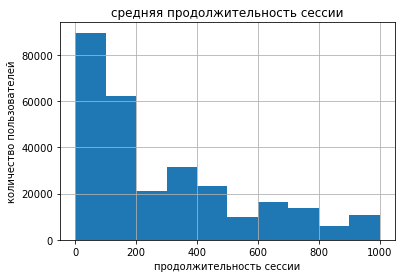

In [20]:
#ASL - cредняя продолжительность сессии

asl = visits
asl['session_duration_sec'] = (asl['End Ts'] - asl['Start Ts']).dt.seconds




asl['session_duration_sec'].hist(bins=10, range=(0,1000))
plt.title('cредняя продолжительность сессии')
plt.ylabel('количество пользователей')
plt.xlabel('продолжительность сессии')
plt.show()


#достаточно много 0 значений поэтому мода будет asl

In [21]:
asl_desktop = desktop_visits
asl_desktop['session_duration_sec'] = (asl_desktop['End Ts'] - asl_desktop['Start Ts']).dt.seconds
asl_touch = touch_visits
asl_touch['session_duration_sec'] = (asl_touch['End Ts'] - asl_touch['Start Ts']).dt.seconds
print('Средння длительность сессии на компьютере (mean) {:.1f}'.format(asl_desktop['session_duration_sec'].mean()))
print('Средння длительность сессии на компьютере (median) {:.1f}'.format(asl_desktop['session_duration_sec'].median()))
display(asl_desktop['session_duration_sec'].mode()[0])


print('Средння длительность сессии на телефоне (mean) {:.1f}'.format(asl_touch['session_duration_sec'].mean()))
print('Средння длительность сессии на телефоне (median) {:.1f}'.format(asl_touch['session_duration_sec'].median()))
display(asl_touch['session_duration_sec'].mode()[0])


Средння длительность сессии на компьютере (mean) 703.9
Средння длительность сессии на компьютере (median) 360.0


<ipython-input-21-51a03f4b8ce5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asl_desktop['session_duration_sec'] = (asl_desktop['End Ts'] - asl_desktop['Start Ts']).dt.seconds
<ipython-input-21-51a03f4b8ce5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asl_touch['session_duration_sec'] = (asl_touch['End Ts'] - asl_touch['Start Ts']).dt.seconds


60

Средння длительность сессии на телефоне (mean) 479.6
Средння длительность сессии на телефоне (median) 180.0


60

*Мода ASL для 2 источников просмотра одинкаковая и равна 60 сек. Но если посмотреть, на другие статистичевкие показатели, то можем увидеть, что в среднем сессия на компютере дольше чем на мобильных устройствах*

**Как часто люди возвращаются?**
<a id='5_link'><a>

<ipython-input-22-fed7f86972a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desktop_visits['session_month'] = desktop_visits['session_date'].astype('datetime64[M]')


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month_desktop,,,,,,,,,,,,
2017-06-01,1.0,0.078988,0.055425,0.063518,0.069460,0.074275,0.061059,0.058601,0.053785,0.050302,0.040775,0.043746
2017-07-01,1.0,0.057393,0.051419,0.055686,0.058673,0.046938,0.045765,0.044165,0.038404,0.029016,0.024749,NaN
2017-08-01,1.0,0.075544,0.062666,0.062931,0.051912,0.042618,0.034785,0.038237,0.029607,0.027616,NaN,NaN
2017-09-01,1.0,0.082446,0.070620,0.051867,0.038182,0.039111,0.034888,0.023568,0.022301,NaN,NaN,NaN
2017-10-01,1.0,0.078013,0.051615,0.037397,0.033748,0.032300,0.021354,0.020764,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.075049,0.042549,0.037255,0.031912,0.022794,0.021225,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.050053,0.036514,0.028891,0.018657,0.018657,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.057554,0.038265,0.024452,0.020284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.056250,0.024888,0.018792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


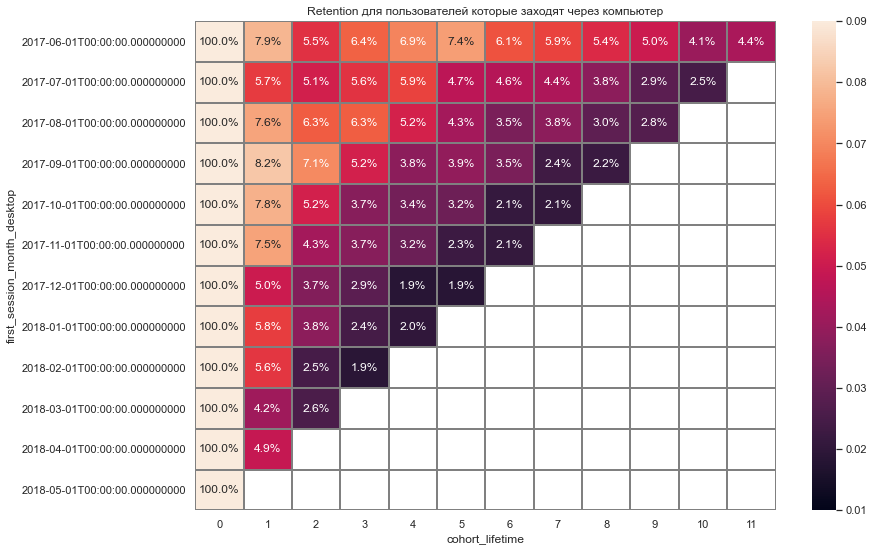

In [22]:
#retention rate for desktop


desktop_visits['session_month'] = desktop_visits['session_date'].astype('datetime64[M]')

first_session_month_desktop = desktop_visits.groupby(['Uid'])['session_month'].min()
first_session_month_desktop.name = 'first_session_month_desktop'
desktop_visits = desktop_visits.join(pd.DataFrame(first_session_month_desktop),on='Uid')

desktop_visits['cohort_lifetime'] = desktop_visits['session_month'] - desktop_visits['first_session_month_desktop']
desktop_visits['cohort_lifetime'] = desktop_visits['cohort_lifetime'] / np.timedelta64(1,'M')
desktop_visits['cohort_lifetime'] = desktop_visits['cohort_lifetime'].round().astype('int')

cohorts = desktop_visits.groupby(['first_session_month_desktop','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index() 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month_desktop','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_session_month_desktop') 
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(index='first_session_month_desktop',columns='cohort_lifetime',values='retention',aggfunc='sum') 
display(retention_pivot)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention для пользователей которые заходят через компьютер')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin=0.01, vmax=0.09); 

<ipython-input-23-5c53baf04555>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  touch_visits['session_month'] = touch_visits['session_date'].astype('datetime64[M]')


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month_touch,,,,,,,,,,,,
2017-06-01,1.0,0.051163,0.030643,0.033926,0.041587,0.033926,0.030096,0.028728,0.025171,0.023529,0.018605,0.02435
2017-07-01,1.0,0.038404,0.031715,0.035927,0.034688,0.029485,0.024529,0.025768,0.022795,0.015857,0.016105,NaN
2017-08-01,1.0,0.059686,0.046771,0.042583,0.030366,0.031414,0.026527,0.027923,0.012216,0.013264,NaN,NaN
2017-09-01,1.0,0.070396,0.048326,0.032534,0.028919,0.021689,0.021689,0.013508,0.015411,NaN,NaN,NaN
2017-10-01,1.0,0.059714,0.040472,0.026816,0.021477,0.021105,0.013656,0.010801,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.065837,0.035806,0.028619,0.025411,0.015529,0.016170,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055369,0.029763,0.025607,0.014613,0.011396,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.051442,0.031948,0.018140,0.013267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.043575,0.017485,0.017347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


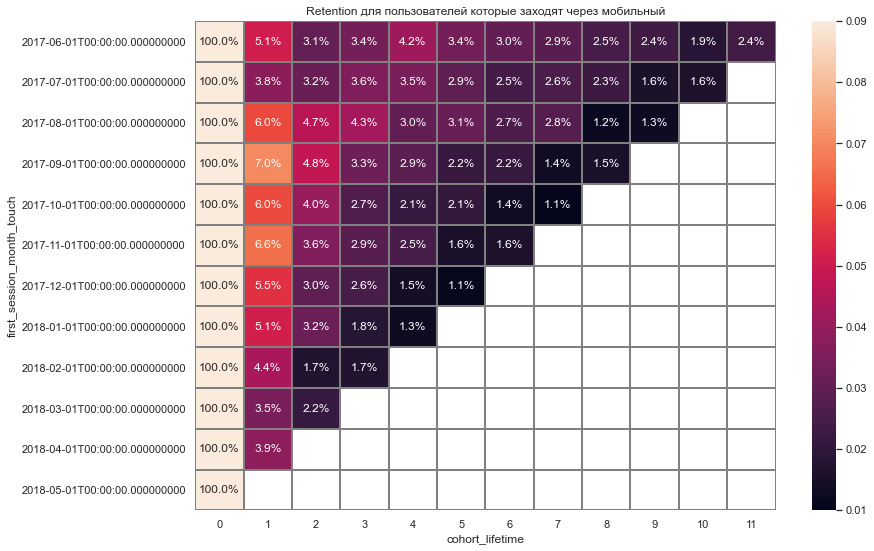

In [23]:
#retention rate for touch

touch_visits['session_month'] = touch_visits['session_date'].astype('datetime64[M]')

first_session_month_touch = touch_visits.groupby(['Uid'])['session_month'].min()
first_session_month_touch.name = 'first_session_month_touch'
touch_visits = touch_visits.join(pd.DataFrame(first_session_month_touch),on='Uid')

touch_visits['cohort_lifetime'] = touch_visits['session_month'] - touch_visits['first_session_month_touch']
touch_visits['cohort_lifetime'] = touch_visits['cohort_lifetime'] / np.timedelta64(1,'M')
touch_visits['cohort_lifetime'] = touch_visits['cohort_lifetime'].round().astype('int')

cohorts_touch = touch_visits.groupby(['first_session_month_touch','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index() 
initial_users_count_touch = cohorts_touch[cohorts_touch['cohort_lifetime'] == 0][['first_session_month_touch','Uid']]
initial_users_count_touch = initial_users_count_touch.rename(columns={'Uid':'cohort_users'}) 
cohorts_touch = cohorts_touch.merge(initial_users_count_touch,on='first_session_month_touch') 
cohorts_touch['retention'] = cohorts_touch['Uid']/cohorts_touch['cohort_users'] 
retention_pivot_touch = cohorts_touch.pivot_table(index='first_session_month_touch',columns='cohort_lifetime',values='retention',aggfunc='sum') 
display(retention_pivot_touch)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Retention для пользователей которые заходят через мобильный')
sns.heatmap(retention_pivot_touch, annot=True, fmt='.1%', linewidths=1, linecolor='gray',vmin=0.01, vmax=0.09); 



*Исходя из результатов retention rate heatmap мы можем сказать что люди очень не часто к нам возвразаються и для 2 источников нет показателя выше 10%, что очень плохо на самом деле. Для десктопной версии, retention rate чуть выше чем для мобильных устройств, но всё равно показатели на очень низком уровне*

## Продажи  
*Когда люди начинают покупать?*  
*Сколько раз покупают за период?*  
*Какой средний чек?*      
*Сколько денег приносят? (LTV)*  

**Когда люди начинают покупать?**  
<a id='6_link'><a>

In [24]:
orders.info()
display(orders.head())
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [25]:
first_orders_session = orders.groupby('Uid')['Buy Ts'].min()
first_orders_session.name = 'first_orders_session'

orders = orders.join(first_orders_session, on='Uid')

In [26]:
orders['first_order_month'] = orders['first_orders_session'].astype('datetime64[M]')
cohort_stats_orders = orders.groupby('first_order_month')['Revenue'].sum()
display(cohort_stats_orders)

first_order_month
2017-06-01    24031.69
2017-07-01    16127.92
2017-08-01    11606.26
2017-09-01    34676.32
2017-10-01    27603.45
2017-11-01    26098.99
2017-12-01    33485.74
2018-01-01    16663.13
2018-02-01    16750.50
2018-03-01    19273.41
2018-04-01    11810.61
2018-05-01    13925.76
2018-06-01        3.42
Name: Revenue, dtype: float64

*Больше всего покупали в сентябре и декабре*

In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761807 entries, 0 to 761806
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Buy Ts     761807 non-null  datetime64[ns]
 1   Revenue    761807 non-null  float64       
 2   Uid        761807 non-null  uint64        
 3   Device     761807 non-null  object        
 4   End Ts     761807 non-null  datetime64[ns]
 5   Source Id  761807 non-null  int64         
 6   Start Ts   761807 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(1), uint64(1)
memory usage: 46.5+ MB


0    1.0
dtype: float64


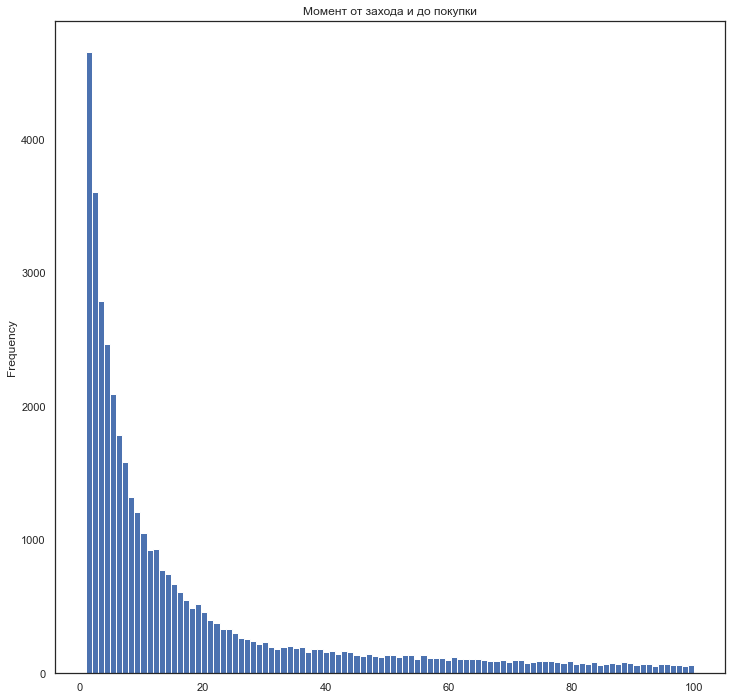

In [28]:

df_3['difference'] = abs(df_3['Buy Ts'] - df_3['Start Ts'])
df_3['difference'] = df_3['difference'].astype('timedelta64[m]')
df_3['difference'].plot.hist(bins=100, figsize=(12,12), title='Момент от захода и до покупки', range=(1,100))

print(df_3['difference'].mode()) #сейм щит, не знаю как верно распаковать значения.



Большинство пользователей совершают покупку в первые 20 минут после первой сессии, что может означать, что основное количетсво покупателей целесообразно переходят на сайт для покупки билетов и сразу почти сразу выходит

**Какой средний чек?**
<a id='8_link'><a>

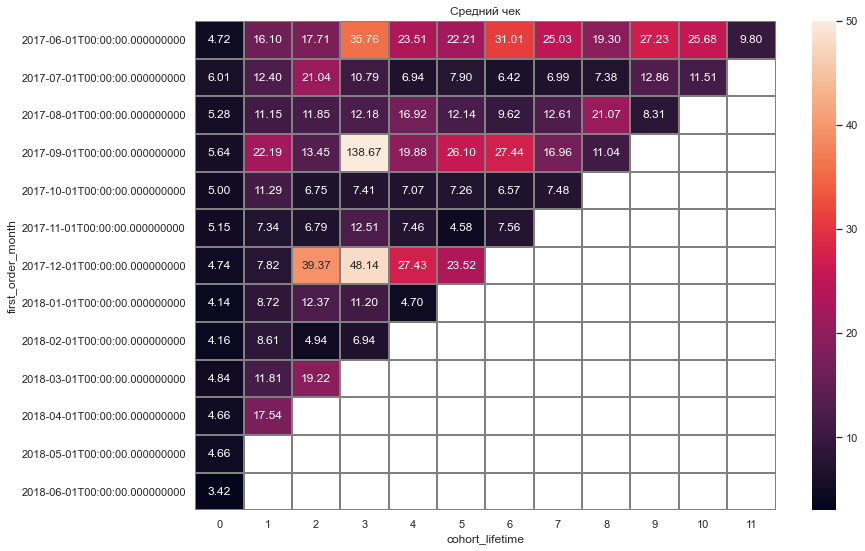

In [29]:

#display(orders.head())
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'Uid':'nunique', 'Revenue': 'sum'})
orders_grouped_by_cohorts['orders_per_player'] = orders_grouped_by_cohorts['Revenue'] /orders_grouped_by_cohorts['Uid']
orders_grouped_by_cohorts = orders_grouped_by_cohorts.reset_index()
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')
orders_grouped_by_cohorts['cohort_lifetime'] = orders_grouped_by_cohorts['cohort_lifetime'].round().astype('int')# Подсчитайте lifetime, при необходимости создайте несколько формул преобразования
lifetime_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                                       columns='cohort_lifetime',
                                                         values ='orders_per_player',
                                                         aggfunc='sum')
#display(lifetime_pivot)


sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Средний чек')
sns.heatmap(lifetime_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=3, vmax=50); 





*Для первой когорты средний чек растет в период жизни когорты, что безусловно хорошо. Да и по остальным когортам, тоже средний чек растет, что тоже хорошо и может означать, что покупатели довольны сервисом и возвращаються покупать, в большем обьеме чем это было в 1 месяц. Также у нас есть одна аномалия у сентябрськой когорты.*

**Сколько денег приносят? (LTV)**
<a id='9_link'><a>

In [30]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Buy Ts                50415 non-null  datetime64[ns]
 1   Revenue               50415 non-null  float64       
 2   Uid                   50415 non-null  uint64        
 3   order_month           50415 non-null  datetime64[ns]
 4   first_orders_session  50415 non-null  datetime64[ns]
 5   first_order_month     50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), uint64(1)
memory usage: 2.3 MB


In [31]:
# рахуємо кількість нових покупців ща місяць
cohort_sizes_ltv = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes_ltv.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes.head()) 
#будуємо когорти. додаємо місяць першої покупки в таблицю із замовленнями




In [32]:
#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу 
#каждого заказа и сложим выручку. Сбросим индекс методом reset_index():
cohorts_ltv = orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
#display(cohorts.head()) 

report_ltv = pd.merge(cohort_sizes_ltv, cohorts_ltv, on='first_order_month')
display(report_ltv.head()) 



,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [33]:
margin_rate = 1
    
report_ltv['gp'] = report_ltv['Revenue'] * margin_rate
report_ltv['age'] = (report_ltv['order_month'] - report_ltv['first_order_month']) / np.timedelta64(1, 'M')
report_ltv['age'] = report_ltv['age'].round().astype('int')
print(report_ltv.head()) 


  first_order_month  n_buyers order_month  Revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4


In [34]:
report_ltv['ltv'] = report_ltv['gp'] / report_ltv['n_buyers']
    
output_ltv = report_ltv.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')
    
display(output_ltv.cumsum(axis=1).fillna('')) 


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


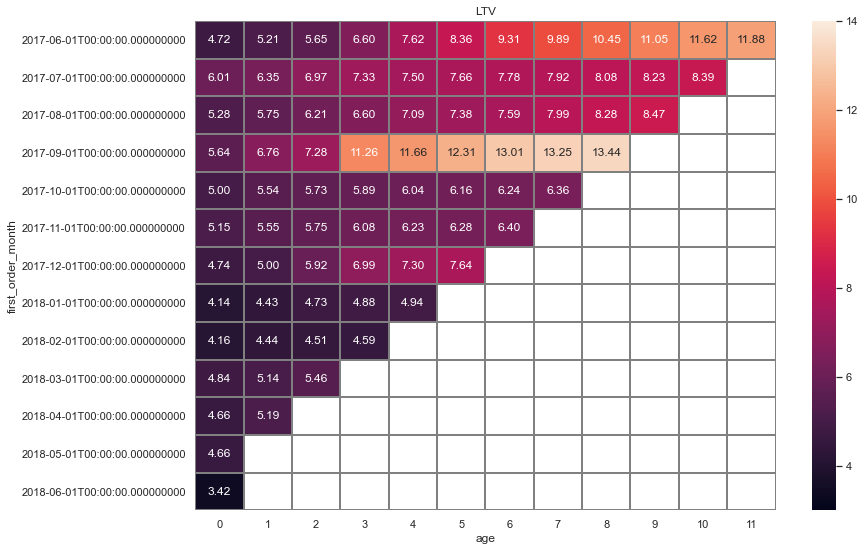

In [35]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output_ltv.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray',vmin=3, vmax=14);

In [36]:
display(output_ltv.cumsum(axis=1).mean(axis=0)) 

age
0      4.801682
1      5.395666
2      5.821811
3      6.689763
4      7.298634
5      7.969053
6      8.387686
7      9.083583
8     10.062084
9      9.251340
10    10.004616
11    11.879234
dtype: float64

*Наш средний LTV растет с "взрослением" когорты, что конечно отличный показатель, удовлетворенности продуктом. И видим чем старше среднняя когорта, тем больше LTV*

## Маркетинг

**Сколько денег потратили? Всего / на каждый источник / по времени**  
<a id='10_link'><a>

In [37]:
costs['month'] = costs['dt'].astype('datetime64[M]') 


source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


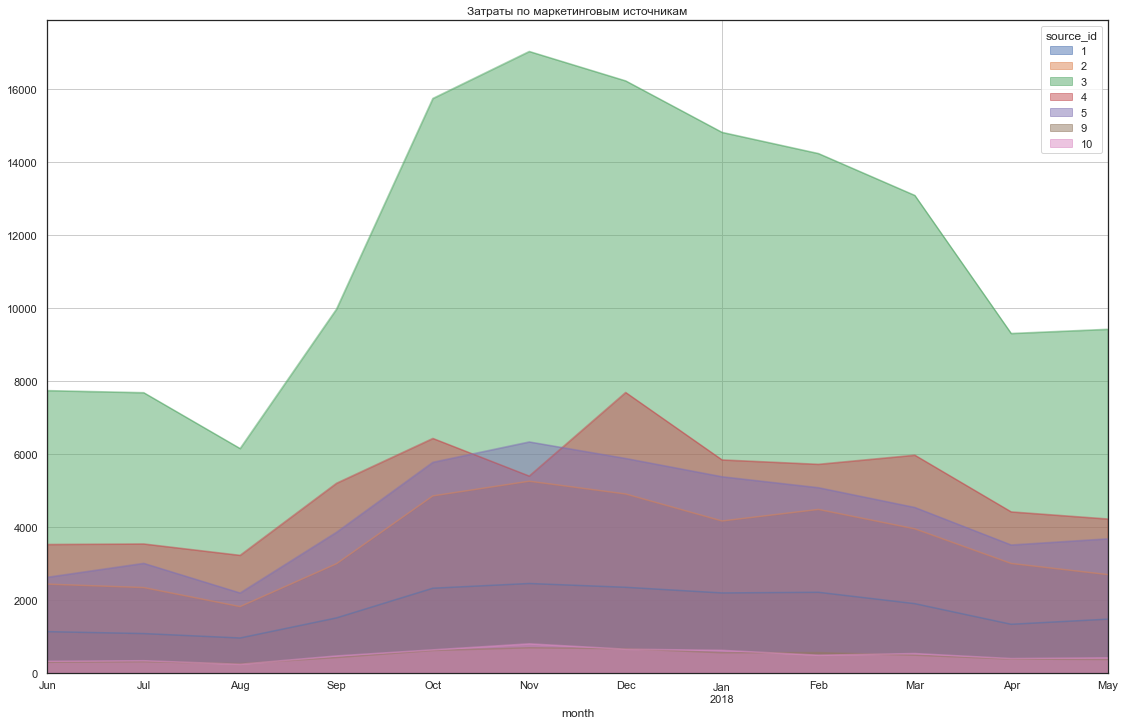

In [38]:
costs_pivot = costs.pivot_table(index=('month'),columns='source_id', values='costs', aggfunc='sum')
display(costs_pivot.head(20))


#plt.title('sdsd')
#plt.figure(figsize=(12,15))
costs_pivot.plot.area(stacked=False, figsize=(19,12),title='Затраты по маркетинговым источникам',
                     grid=True)

*Больше всего потратили на источники 3,4 и 5*

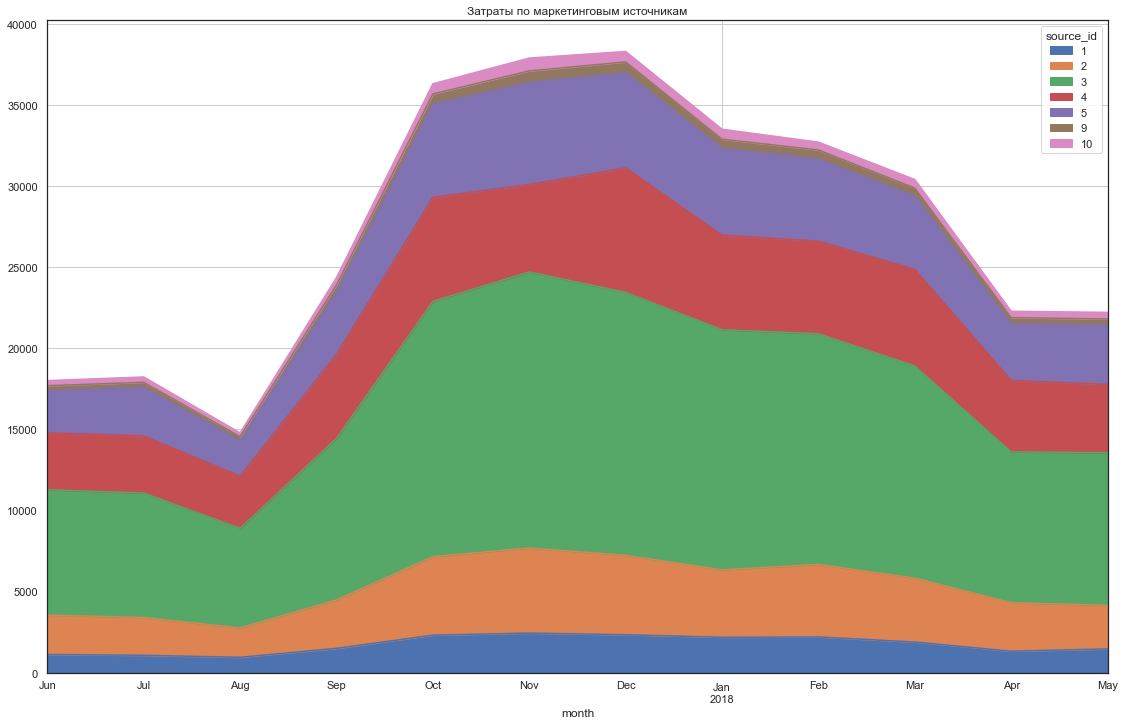

In [39]:
costs_pivot.plot.area(stacked=True, figsize=(19,12),title='Затраты по маркетинговым источникам',
                     grid=True)
plt.show()

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


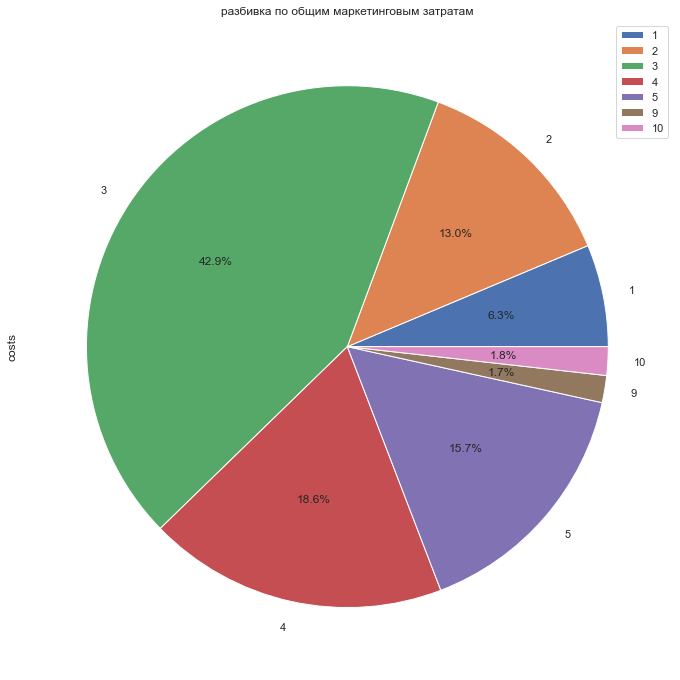

In [40]:
costs_pivot_total = costs.pivot_table(index=('source_id'), values='costs', aggfunc='sum')
display(costs_pivot_total.head(10))


costs_pivot_total.plot.pie(y='costs', figsize=(12,12), title='разбивка по общим маркетинговым затратам',
                            autopct='%1.1f%%')

Больше всего затрат у нас идет по 3,4 и 5 источникам

**Сколько стоило привлечение одного покупателя из каждого источника?** 
<a id='11_link'><a>

In [41]:
visits = visits.rename(columns={'Source Id': 'source_id'})


In [42]:
#df_0 = df_0.merge(costs, on='Uid')


In [43]:
df_0['order_month'] = df_0['Buy Ts'].astype('datetime64[M]')  
#df_0['order_month'] = df_0['order_month'].astype('datetime64[M]')  
display(df_0.head(10))

,Buy Ts,Revenue,Uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01
7,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01
8,2017-06-01 09:22:00,3.30,17542070709969841479,2017-06-01
9,2017-06-01 09:23:00,0.37,1074355127080856382,2017-06-01


In [44]:


df_1['month_1'] = df_1['dt'].astype('datetime64[M]')   

In [45]:
def print_cac_romi(df_1):
    first_orders = df_0.groupby('Uid').agg({'order_month': 'min'}).reset_index()
    first_orders.columns = ['Uid', 'first_order_month']

    cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_order_month', 'n_buyers']
    margin_rate = 1

    orders_first_month = pd.merge(df_0,first_orders, on='Uid')
    cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
    report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

    report['gp'] = report['Revenue'] * margin_rate
    report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    report['ltv'] = report['gp'] / report['n_buyers']

    monthly_costs = df_1.groupby(['month_1']).agg({'costs':'sum'}).reset_index()
    report_new =  pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month_1')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    report_new['romi'] = report_new['ltv'] / report_new['cac']

    final_result_cac = report_new.pivot_table( index='first_order_month', columns='age', values='cac', aggfunc='mean')
    final_result_romi = report_new.pivot_table( index='first_order_month', columns='age', values='romi', aggfunc='mean')
    
    
       
    #print('Средний ROMI для источника',final_result_romi.cumsum(axis=1))
    sns.set(style='dark')
    plt.figure(figsize=(13, 9))
    plt.title('Средний ROMI для источника')
    sns.heatmap(final_result_romi.cumsum(axis=1), annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=0, vmax=33); 
    



In [46]:
first_orders = df_0.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
margin_rate = 1

orders_first_month = pd.merge(df_0,first_orders, on='Uid')
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

monthly_costs = df_1.groupby(['month_1', 'source_id']).agg({'costs':'sum'}).reset_index()
report_new =  pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month_1')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']

display(report_new)

,first_order_month,n_buyers,order_month,Revenue,gp,age,ltv,month_1,source_id,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,1,1125.61,0.556406,8.490943
1,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,2,2427.38,1.199891,3.937369
2,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,3,7731.65,3.821873,1.236151
3,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,4,3514.80,1.737420,2.719213
4,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414,2017-06-01,5,2616.12,1.293188,3.653307
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562,2018-05-01,3,9411.42,3.149739,1.479666
542,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562,2018-05-01,4,4214.21,1.410378,3.304477
543,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562,2018-05-01,5,3669.56,1.228099,3.794940
544,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562,2018-05-01,9,362.17,0.121208,38.450893


age,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,0.576677,1.161127,1.745696,2.335681,2.923939,3.503642,4.090937,4.675859,5.273615,5.876641,6.433804,6.990211
2,1.183436,2.392632,3.591215,4.798963,6.004491,7.206143,8.421829,9.623476,10.846445,12.091476,13.298054,14.497945
3,3.906698,7.882210,11.846802,15.840517,19.846301,23.797142,27.789698,31.746393,35.785740,39.884754,43.791106,47.612980
4,1.734494,3.498452,5.245112,6.998348,8.775176,10.558800,12.347640,14.230154,16.213433,18.187230,19.973706,21.711126
5,1.432283,2.883129,4.325230,5.785111,7.253848,8.704905,10.174498,11.628020,13.112699,14.595158,16.021300,17.314488
9,0.152793,0.308457,0.463278,0.620196,0.777847,0.934845,1.092990,1.249283,1.409545,1.569550,1.718708,1.859697
10,0.160977,0.324118,0.486515,0.650400,0.818308,0.984182,1.153143,1.317064,1.485834,1.651366,1.814785,1.970109


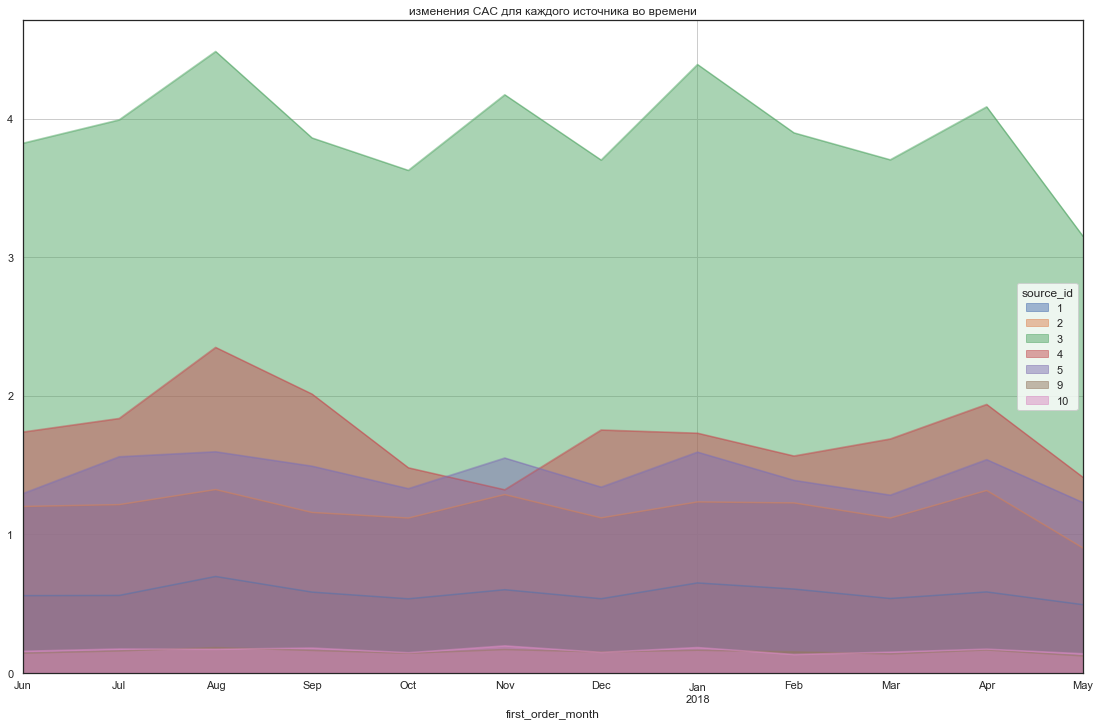

In [47]:
first_orders = df_0.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
margin_rate = 1

orders_first_month = pd.merge(df_0,first_orders, on='Uid')
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']


monthly_costs = df_1.groupby(['month_1', 'source_id']).agg({'costs':'sum'}).reset_index()
report_new =  pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month_1')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']

result_cac = report_new.pivot_table( index=('source_id'), columns=('age'), values='cac', aggfunc='mean')

#сколько в среднем нам обходится привлечение одного пользователя из каждого канала
display(result_cac.cumsum(axis=1))

cac_plot = report_new.pivot_table( index='first_order_month', columns='source_id', values='cac', aggfunc='mean')
cac_plot.plot.area(stacked=False, figsize=(19,12),title='изменения CAC для каждого источника во времени',
                     grid=True)

None

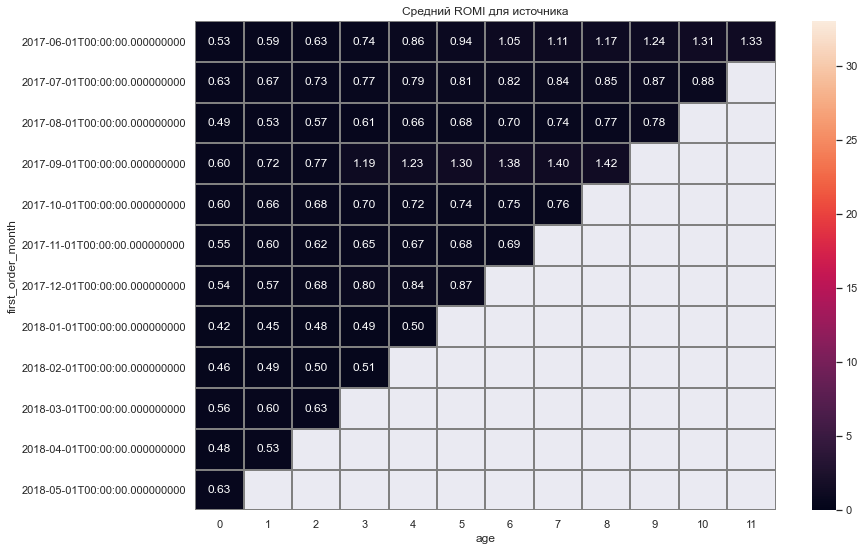

In [48]:
display(print_cac_romi(df_1))


None


None

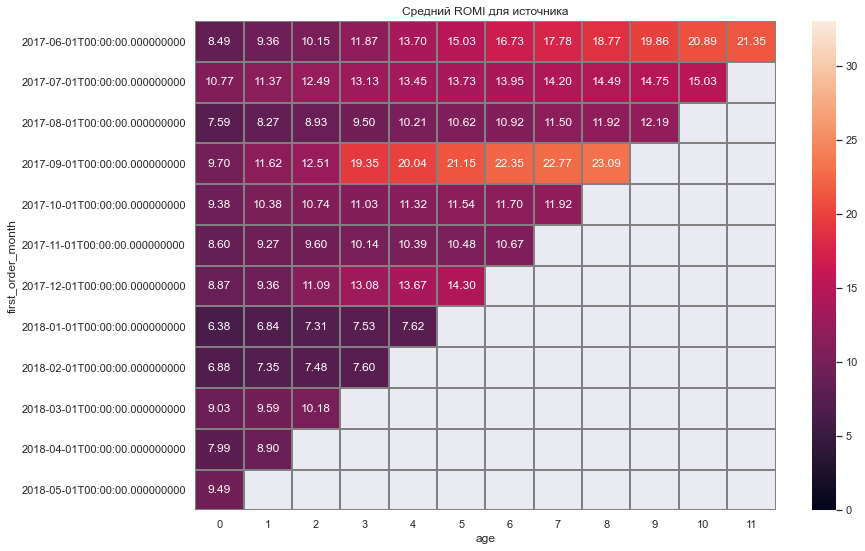

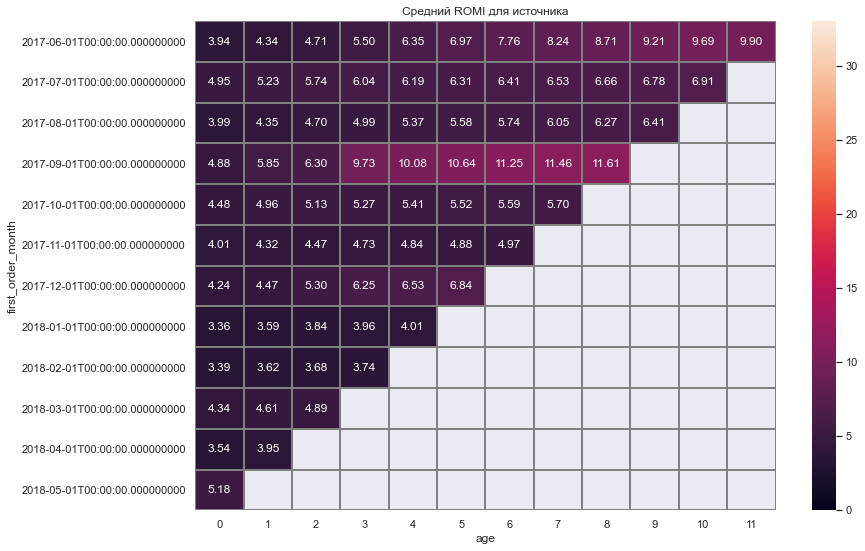

In [49]:
print(print_cac_romi(df_1.query('source_id == 1'))) # 
display(print_cac_romi(df_1[df_1['source_id'] == 2])) # 


None

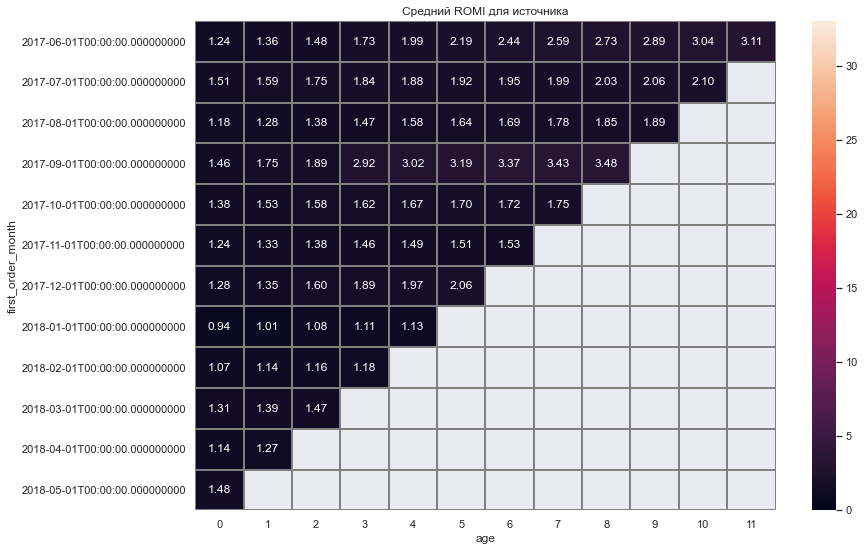

In [50]:
display(print_cac_romi(df_1[df_1['source_id'] == 3])) # 


None

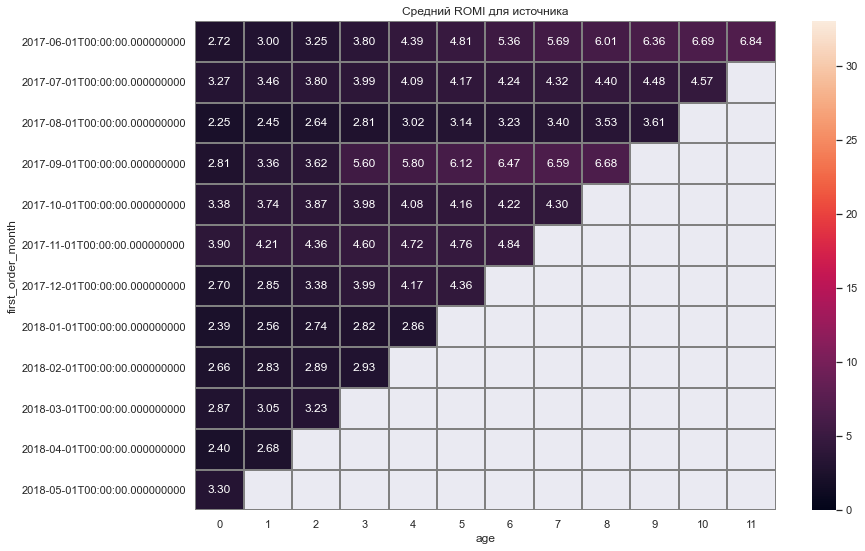

In [51]:
display(print_cac_romi(df_1[df_1['source_id'] == 4])) # 


None

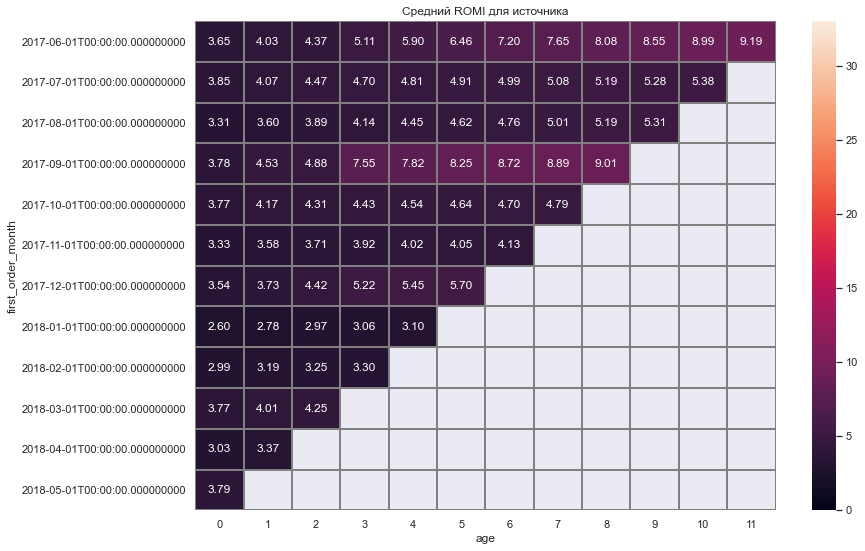

In [52]:
display(print_cac_romi(df_1[df_1['source_id'] == 5])) # 


None

None

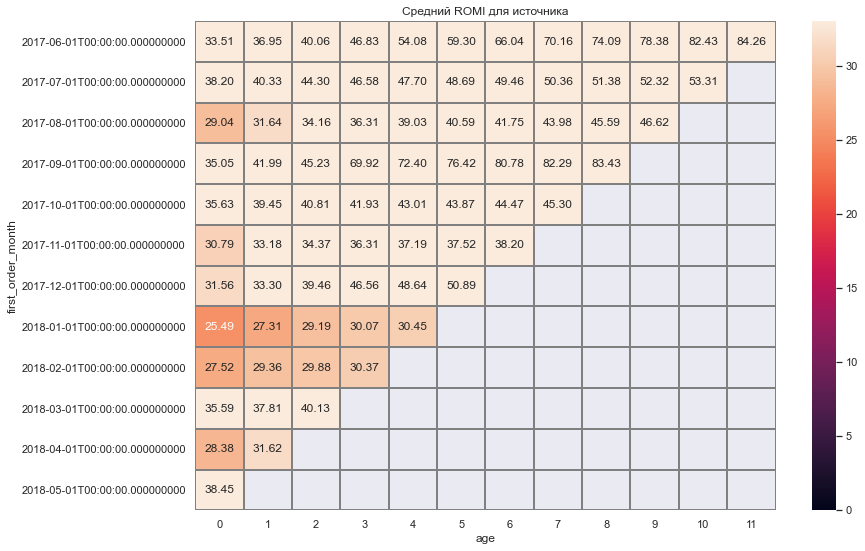

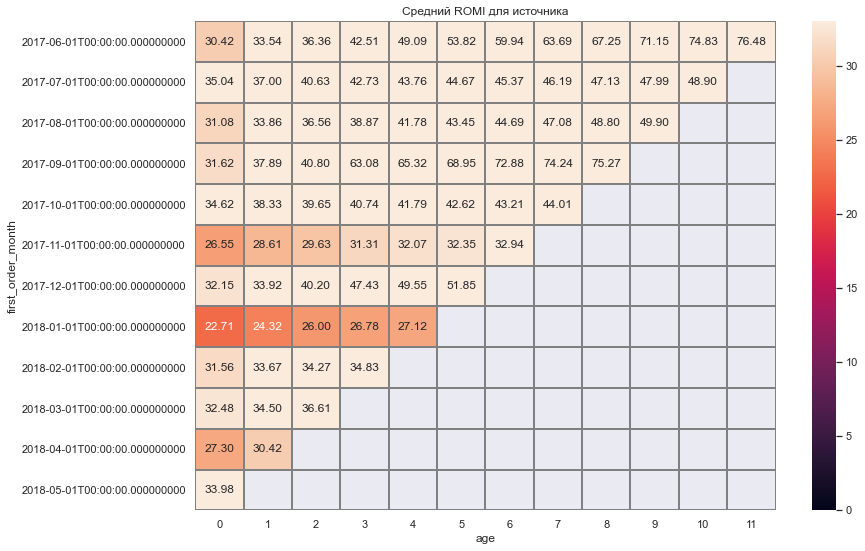

In [53]:
display(print_cac_romi(df_1[df_1['source_id'] == 9])) # 
display(print_cac_romi(df_1[df_1['source_id'] == 10])) # 


**ROMI рекламной кампании = валовая прибыль из этой кампании / затраты.**
<a id='12_link'><a>

*Самое интересное то что исходя из финальных показателей средний ROMI для всех источников высокий. самые низкие показатели CAC у первого источника (там же и очень высокие показатели ROMI)*

## Общий вывод
<a id='13_link'><a>

## После проведенного анализа мы получили следующие результаты:    


**DAU,MAU,WAU and Sticky factor**  
Количество юзеров в день для компьютера: 659  
Количество юзеров в неделю для компьютера: 4208  
Количество юзеров в месяц для компьютера: 16724  
Sticky фактор за неделю 15.00 для компьютера  
Sticky фактор за месяяц 3.00 для компьютера  

Количество юзеров в день для мобильных: 252  
Количество юзеров в неделю для мобильных: 1666  
Количество юзеров в месяц для мобильных: 6825  
Sticky фактор за неделю 15.00 для мобильных  
Sticky фактор за месяяц 3.00 для мобильных  

Эти результаты показывают нам, что компютеры в 2,5 раза популярней чем мобильные устройства в Яндекс.Афише. 


**Количество сессий в день**  
Тут ситуация  у нас очень похожая к результатам DAU, а именно что пользователей которые заходять с компютеров в 2,5 раза больше. Есть предположение, что мобильная версия не самая удобная
для пользования.

Среднее количество сессий в день на одного компьютерного пользователя 1.09
Среднее количество сессий в день на одного мобильного пользователя 1.05

Показатели количества сессий в день практически одинаковые для 2 источников и показывают нам, что пользователи заходят, покупают билеты и уходят, долго не задерживаясь на сайте

**Cредняя продолжительность сессии**   
Как за показатель средней продолжительности сессии мы взяли моду и что интересно среднняя продолжительность сессии у нас 60 секунд как для мобильных
устройств так и для компьютеров. Такие показатели, показывают, что люди заходят на сайт афиши купить билет и выйти, а неверно эти сессии, это сессии покупок причем люди вероятно уже
заходили на нужный им сеанс и тд из внешних источников, покупали билет и выходили

**Retention rate**  
Исходя из результатов retention rate heatmap мы можем сказать что люди очень не часто к нам возвразаються и для 2 источников нет показателя выше 10%. Для десктопной версии, retention rate чуть выше чем для мобильных устройств, но всё равно показатели на не очень высоком уровне. С другой стороны мы предлагаем более менее специфическую услугу (которой не все пользуютсья), так что однозначно высок ли retention rate или низкий сказать нельзя. 

**В общем больше всего покупали в сентябре и декабре**  
Тут я думаю играет фактор сезонности. В сентябре люди возращаються в город и идет пик на развлечение в городе. Декабрь наполовину праздинчынй месяц, думаю это тоже влияет

**Сколько нужно посетителю от первого входа до первой покупки**  
Большинство пользователей совершают покупку в первые 20 минут после первой сессии, что может означать, что основное количетсво покупателей целесообразно переходят на сайт для покупки билетов и сразу почти сразу выходит


**Средний чек**  
Для первой когорты средний чек растет в период жизни когорты, что безусловно хорошо. Да и по остальным когортам, тоже средний чек растет, что тоже хорошо и может означать, что покупатели довольны сервисом и возвращаються покупать, в большем обьеме чем это было в 1 месяц. Также у нас есть одна аномалия у сентябрськой когорты.

**LTV**  
Наш средний LTV растет с "взрослением" когорты, что конечно отличный показатель, удовлетворенности продуктом. И видим чем старше среднняя когорта, тем больше LTV


**Затраты по маркетинговым источникам**  
Имеем такие показатели:  
1 источник   20833.27  
2 источник	42806.04  
3 источник	141321.63  
4 источник	61073.60  
5 источник	51757.10  
9 источник	5517.49  
10 источник	5822.49  

Больше всего затрат у нас идет по 3,4 и 5 источникам

**CAC**  
САС как и ожидалось самый большой у 3,4 и 5 источников

**ROMI**  
Самые "сильные" показатели ROMI у источников 9,10

**Обобщаем**  
*Исходя из проведенного анализа, рекомендовал бы маркетологам больше опираться на пользователей которые используют десктопные версии. Тажке рекомендовал бы использовать 1,9 и 10 источники привлечения пользоватлей, так как у них низкие затраты привлечение на 1 юзера, но при этом высокие показатели ROMI*